#**SPRINT 02 - Construçao do DockerFile e Datanodes**
##**Objetivo da Sprint 02 :**
###**Construir o Dockerfile, datanode1 e datanode2 para um cluster Hadoop HDFS.**

Após finalizar a Sprint 01 com as entregas do Dockerfile e do Namenode configurado e operando, inicio agora a construção do Dockerfile, criação e configuração do datanodes1 e datanode2 e integração de ambos ao Namenode.

###**Entregas esperadas para essa Sprint de trabalho**
01- Configuração do Dockerfile;\
02- Criação e configuração dos 02 Datanodes;\
03- Integração do Namenode com o datanode1 e datanode2

**Fases do trabalho:**
* Download do **Apache Hadoop** e do **JDK 8**;
* Criação da imagem para os **02 containers**;
* Verificação do status da rede criada na sprint 01 para os containers;
* Criação e inicialização dos containers para os **02 Datanodes**;
* Inicialização do serviço ssh dentro de cada container, os **02 Datanodes**;
* Ajustar os privilégios dentro dos containers de cada **Datanode**;
* Criação da pasta chamada **~/.ssh**;
* Ajuste de privilégios da pasta **~/.ssh**;
* Criação do arquivo **~/.ssh/authorized_keys**;
* Ajustar os privilégios para o arquivo criado;
* Copiar a chave **SSH** que está no Namenode para os **02 Datanodes**;
* Iniciar o serviço dos 02 **02 Datanodes**;;
* Acessar o Localhost e verificar o status do **Namenode** e **02 Datanodes**
---

###**01- Configuração do DockerFile para o datanode1 e datanode2**

Conforme citei na **Sprint 01**, o Dockerfile age como uma receita que instrui o Docker sobre como construir uma imagem personalizada para o nosso serviço. Para os dois **datanodes**, a estrutura do Dockerfile seguiu as recomendações da documentação oficial do Docker.\
 https://docs.docker.com/engine/reference/builder/

**A estrutura do dockerfile foi montada com as seguintes etapas:**
* Comando para definir o **sistema operacional**;
* Comando para realizar **Updates e instalações**;
* Comando para criar o usuário para a **instalação do Apache Hadoop**;
* Comando para copiar o arquivo de configuração do **ssh**;
* Comando para **mudar o usuário**;
* Comando para criar uma **pasta de trabalho**;
* Comando para criar um **usuário de trabalho**;
* Comando para copiar os **binários do JDK**;
* Comando para ajustar as **variáveis de ambiente JDK**;
* Comando para copiar os binários do **Apache Hadoop**;
* Comando para ajustar as variáveis de ambiente do **Apache Hadoop**;
* Comando para criar as pastas para os arquivos dos **02 DataNodes**;
* Comando para copiar os **arquivos de configuração**;
* Comando para criar as **portas** que poderão ser usadas.

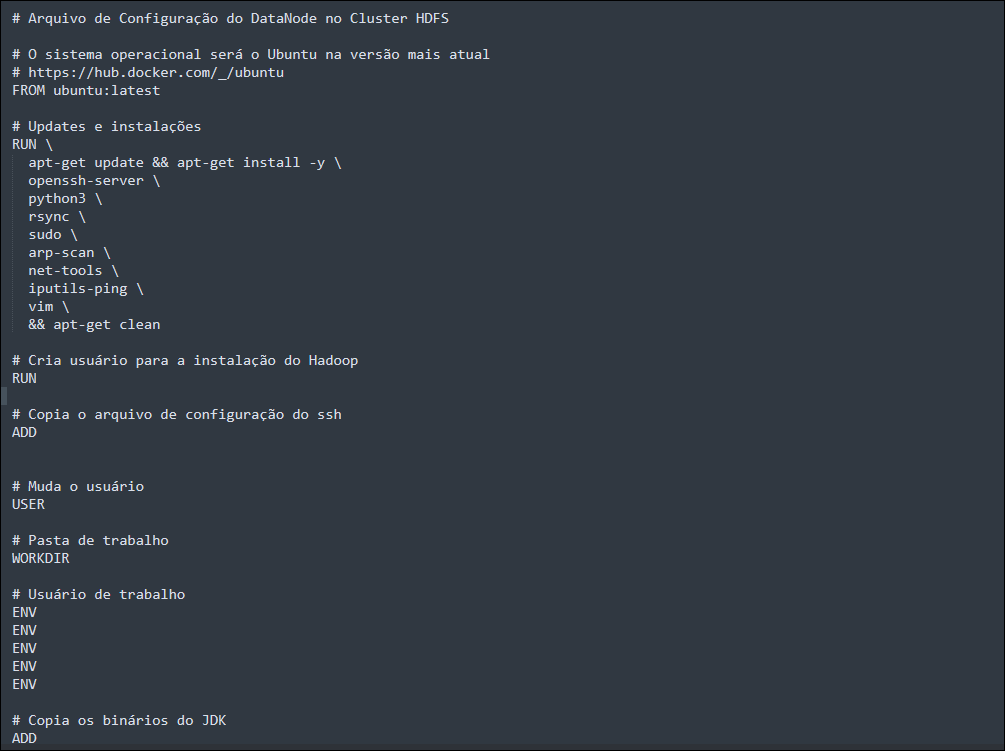


 **Observação:** Na foto, não coloquei os demais códigos, pois contêm informações de configuração específicas do ambiente, como senhas e caminhos de diretórios, que poderiam representar riscos de segurança se fossem expostas.

---




###**2- Criação e configuração do datandoe1 e datanode2**

Em resumo, os **Datanodes** são os "trabalhadores" do **hadoop HDFS**, responsáveis por armazenar e gerenciar os dados em um **cluster Hadoop HDFS**, garantindo sua disponibilidade, integridade e eficiência. Eles desempenham um papel crítico no funcionamento do ecossistema do cluster Hadoop HDFS. Suas configurações são essenciais, necessitarei do dowload do Apache hadoop de o JDK8 para configuração do cluster.

###**2.1- Execute o download do Apache Hadoop e do JDK 8.**

Por que necessito fazer o downloads do Apache Hadoop e do Java 8?

* **O JDK (Java Development Kit) 8** é necessário porque o **Hadoop** é escrito em Java e requer uma versão específica do **JDK** para funcionar corretamente.

* Já o **Apache Hadoop** é o software principal que permite o armazenamento e processamento distribuído de dados em um cluster **HDFS (Hadoop Distributed File System)**. Portanto, usei essas duas ferramentas para configurar e operar um **namenode** eficaz no cluster HDFS.

---


###**2.2- Passos para Download do Apache Hadoop**


**A-** Meu primeiro passo foi acessar o site do Apache Hadoop em **https://hadoop.apache.org/** e buscar a seção de Downloads."

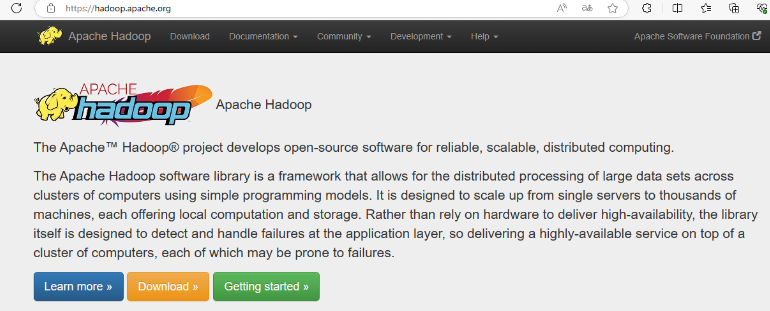


**B-** Na pasta de Downloads busquei a **versão 3.3.4** que está no link **“ All previous releases of Hadoop are available from the https://archive.apache.org/dist/hadoop/common/**, que contém todas as versões antigas do Apache Haddoop.


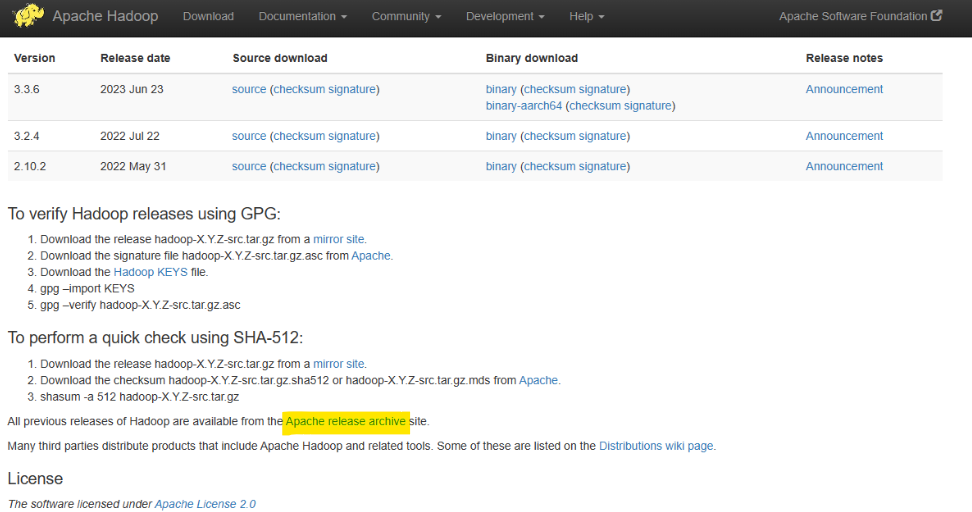




**C-** Dentro da pasta do **Apache release archive**, eu selecionei o arquivo **hadoop-3.3.4./**

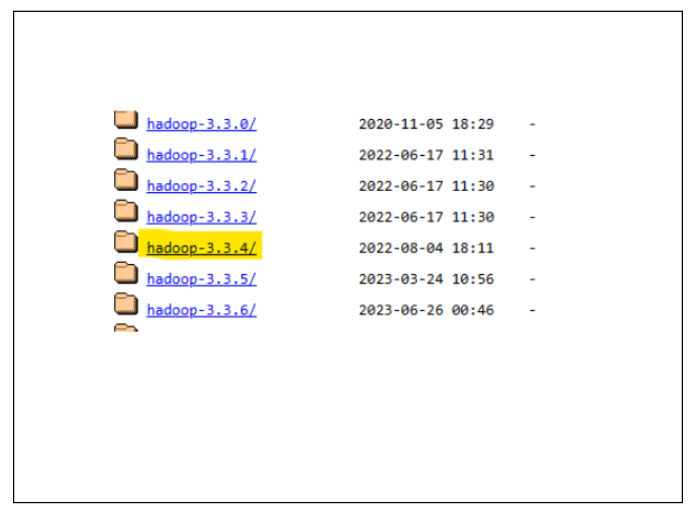



**D-** Dentro da pasta **Hadoop-3.3.4/**, escolhi o arquivo **hadoop3.4.tar.gz** para downloads. O Colocando o arquivo em uma pastta de trabalho.

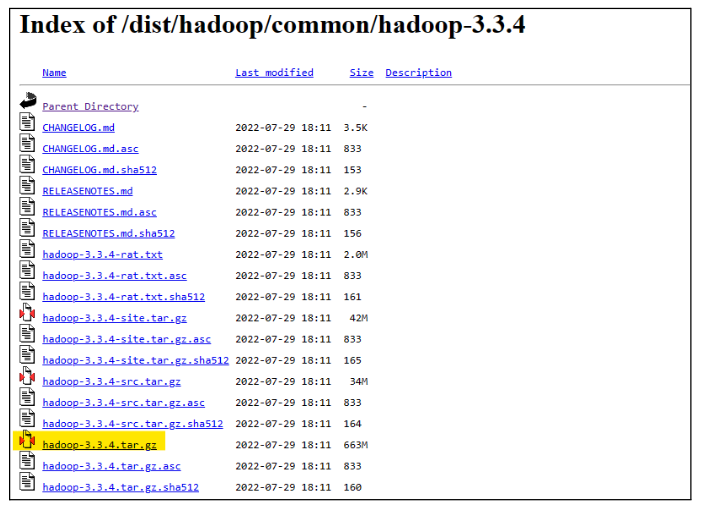

---

###**2.3- Passos para Dowlaods JDK 8**

**A-** Para executar o **download do JDK 8**, foi necessário acessar o site da Oracle com minhas credenciais de login em  **"https://www.oracle.com/java/technologies/downloads/#java8**.\

Em seguida, fiz o download do arquivo necessário,**jdk-8u381-linux-x64.tar.gz, que é a versão do Java 8.**\
Após o download, coloquei o arquivo na minha pasta de trabalho.

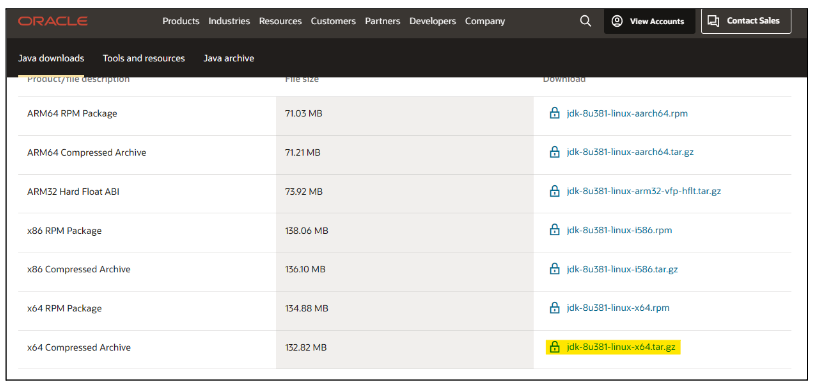



**B-** Dentro da pasta de trabalho, descompactei os arquivos e renomeei-os para **'Jdk' a partir de 'jdk-8u381-linux-x64.tar'** e para **'hadoop' a partir de 'hadoop1-3.3.4.tar'**. Essas alterações são cruciais, pois os nomes renomeados são usados no Dockerfile durante a criação da imagem. Não realizar essas alterações teria resultado em erros durante a criação da imagem.

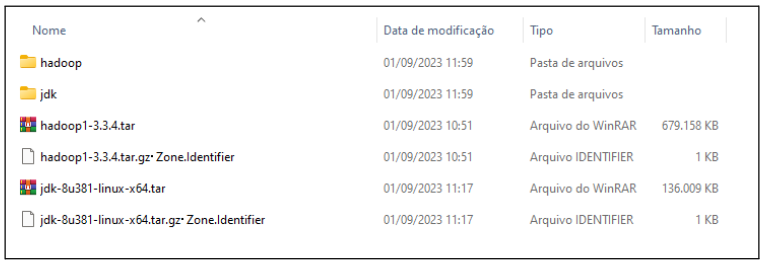

---

###**2.4- Criando a Imagem via docker**

Uma imagem é um pacote completo e autossuficiente que contém todos os componentes necessários para executar um aplicativo. Ela serve como um modelo para criar containers, permitindo que os aplicativos sejam executados de forma consistente e isolada em ambientes Docker.

**A-** Certifiquei-me de que os arquivos necessários estavam na pasta de trabalho, conforme mencionado. Em seguida, abri o terminal e naveguei pelo caminho Datalake/datalake12/datanode onde eu tenho meu arquivo Dockerfile.\
Executei o seguinte comando para criar a imagem:

***docker build . -t datanode:dsa***

Isso criou uma imagem chamada **"datanode"** com a tag **"dsa"** a partir das instruções que defini no meu Dockerfile.

Agora, eu estou pronto para usar essa imagem para criar e executar os dois containers, **datanode1 e datanode2**.

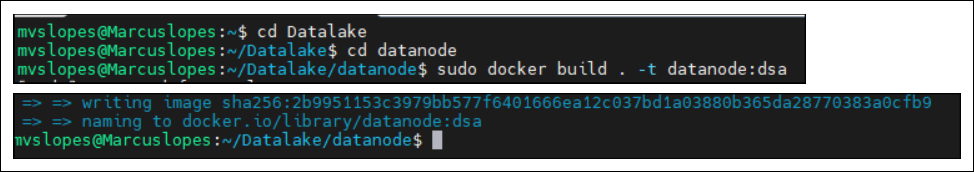




**B-** Para verificar se a imagem foi criada, eu utiliziei o terminal do Linux através comando:\
***Sudo docker images***\

Imagem foi criada como **datanode** e a sua **tag: dsa**

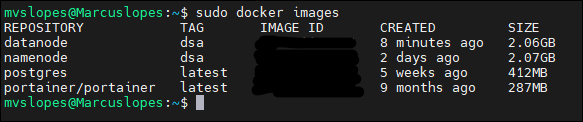



**C-** Outra forma que utilizei para gerenciar minhas imagens e containers foi através do **Portainer**, que é uma interface web que interage com o **socket** do Docker para criar novos containers e monitorá-los.

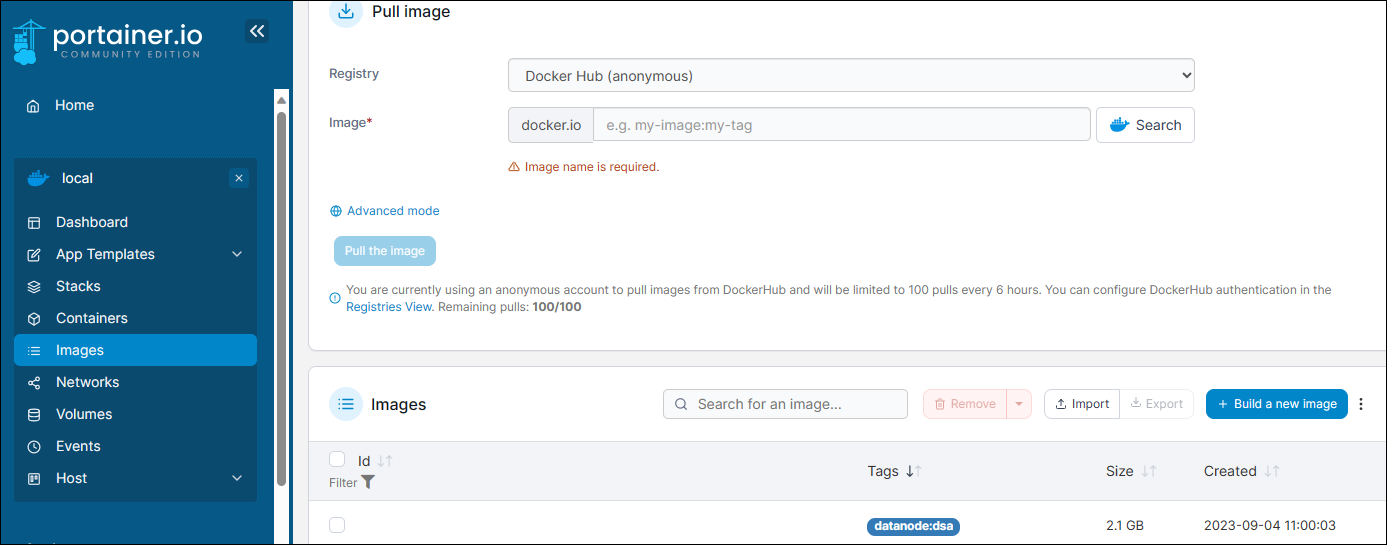

---

###**2.5-Verificando os status da rede criada**

**A-** Precisarei de uma rede para interligar o **namenode** e os dois **datanodes**. Como ja tinha criado a rede **dsa_dl_net** na **sprint 01** para esse fim. Eu executei o comando **"docker network ls"** para inspecionar o status dela.

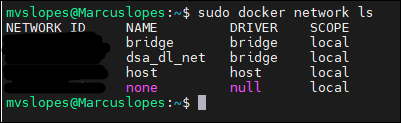

---




###**2.6- Criando e inicializando os containers do datanode1 e datanode2**

**A-**  Criei dois containers configurados como dois **Datanodes**. Esses containers estão conectados à rede **"dsa_dl_net"**, juntamente com o container **Namenode** que foi criado na Sprint 01.


**Observação:** Por questões de segurança, os códigos dos dois containers dos **Datanodes** não foram disponibilizados. No entanto, segui a mesma estrututura citada  **documentação do docker para criação de containers**. **https://docs.docker.com/engine/reference/commandline/run/**

Executei esses containers via terminal dentro da pasta **"binarios"**, onde estão os **arquivos JDK e Hadoop**.



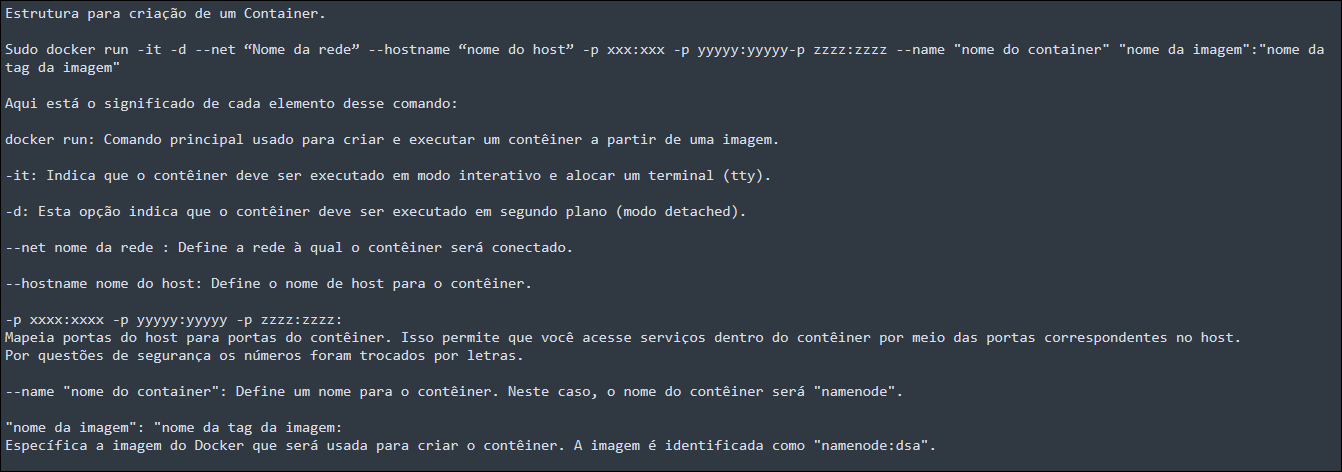



**B-** Após a criação dos containers **"datanode1"** e **"datanode2"**, usei o comando **"sudo docker ps -la"** e o  gerenciador de containers **Portainer.io** para verificar o status dos três containers.

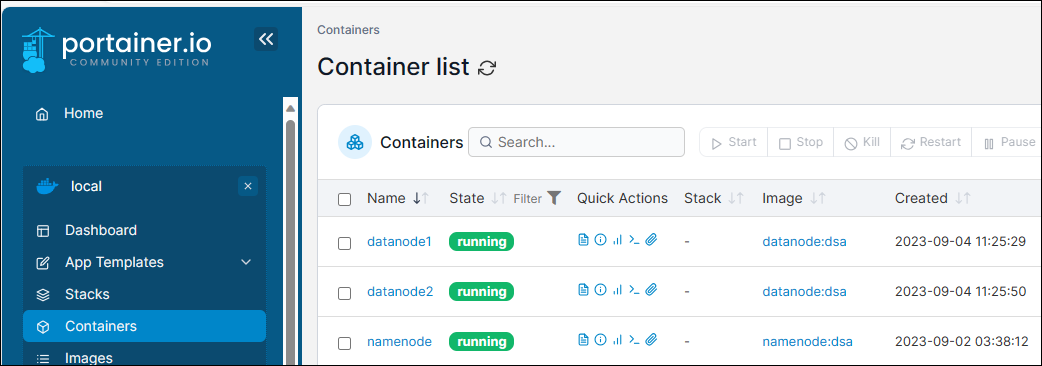

---


###**2.7- Acessar os containers, datanode1 e datanode2**
**Configuração interna**

As configurações abaixo foram realizadas nos containers dos datanodes, pois são necessárias. Após subir os containers, datanode 01 e datanode 02, as configgirações abaixo garantiram que o ambiente estivessem configurados corretamente e pronto para ser usado no cluster Hadoop.

Configurações esperadas:

* Copiar a Chave **shh**;
* Iniciar o serviço **ssh** dentro dos containers **datanode1** e **datanode2**;
* Ajustar os privilégios dentro dos containers **datanode1** e **datanode2**;
* Criar uma pasta chamada **~/.ssh**;
* Ajustar o privilégios da pasta **~/.ssh**;
* Criar o arquivo **~/.ssh/authorized_keys**;
* Ajustar os privilégios para o **arquivo criado**;
* Copiar a chave **SSH** que está no **NameNode** para cada **Datanode**;
* Iniciar o serviço dos dois **Datanodes**;
* Acessar o navegador Localhost e verificar o **Namenode** e os dois **Datanodes**.




**A- Configurando Internamente os containers, Datanode1 e datanode2**\
**|Copiando a chave SSh.|**

* Para esse processo, eu acessei iternamente o container **Namenode** através dos comandos na imagem.

* Dentro do container acessi a pasta **.ssh**

* Utilizei o comando **cat**.

O comando **"cat"** no arquivo **"authorized_keys"** lista a chave pública que permite o acesso a esse sistema remotamente sem a necessidade de fornecer uma senha. Após pressionar "Enter", eu copiei minha chave, pois a usarei nos **datanodes** para conceder a eles permissões de acesso.

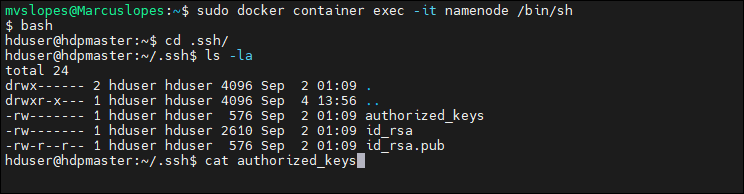




**B-Configurando Internamente os containers, Datanode1 e datandoe2**\
**|Service ssh restart|**

A instrução **"sudo service ssh restart"** é usada para reiniciar o serviço SSH dentro de um container. Utilizei na configuração do Namenode e agora vou utilizar na configuração do datanode1 e datanode2.\
Isso é necessário porque, durante a construção do container e da imagem, foram realizadas configurações relacionadas ao SSH, como a geração de chaves SSH e a configuração do acesso sem senha.\
Portanto, **executar "sudo service ssh restart"** é importante para garantir que o SSH esteja configurado e funcionando corretamente dentro de cada container, o que pode ser necessário para acessar e gerenciar o contêiner remotamente.

Entrei em cada container, através do comando.\
***sudo docker container exec -it nome do container/bin/sh***, Ou posso usar o container console do portainer.io

Usando o comando acima, ao entrar em cada container digite **bash** e em seguida o comando\
***sudo service ssh restart***

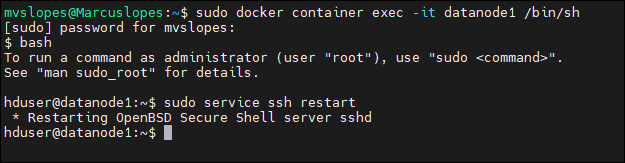


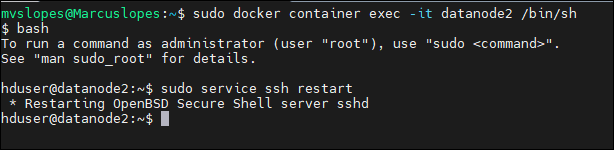


**Observação: Fiz esse processo para o datanode1 e para o datanode2**






**C- Configurando Internamente os Containers, Datanode1 e Datanode2**\
**|Ajuste dos privilégios|**

Fiz os ajustes de privilégios para conceder ao usuário **"hduser"** o controle total sobre os diretórios relevantes dentro dos containers. Isso é fundamental para garantir que o ambiente **Hadoop HDFS** funcione corretamente, pois o Hadoop requer permissões específicas para acessar e gerenciar seus diretórios de trabalho, armazenamento e outros recursos.

Executados os comandos abaixo:

***sudo chown -R hduser:hduser/home/hduser/jdk***\
***sudo chown -R hduser:hduser/home/hduser/hadoop***

Resultados:
Troca do usuario root, para Hduser em jdk e Hadoop

**Datanode 01 - Antes**

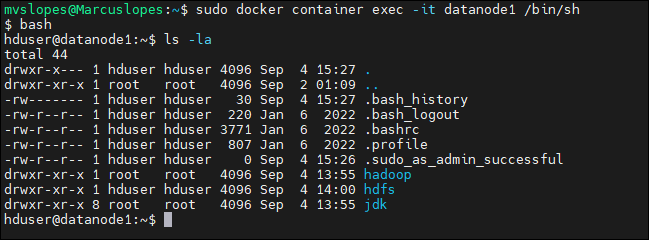


**Datanode 01 - Depois**

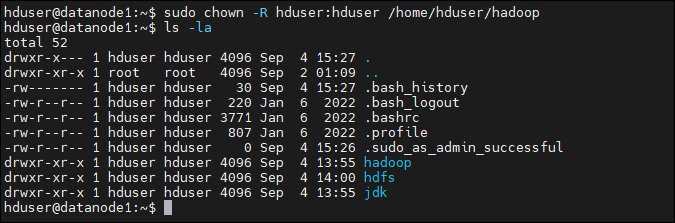

**Observação: Repeti esse mesmo processo para o datanode2**




**D- Configurando Internamente o Containers, Datanode1 e Datanode2**

Dentro do container datanode1 executar os comandos abaixo:

* Criar uma pasta chamada **~/.ssh**;\
comando: sudo mkdir ~/.ssh

* Ajustar os privilégios da **pasta criada**;\
Comando: sudo chown -R hduser:hduser /home /hduser /.ssh

* Criar o arquivo **~/.ssh/authorized_keys**;\
Comando: sudo touch ~/.ssh/authorized_keys

* Ajustar os privilégios para o **arquivo criado**;\
Comando: sudo chmod 600 ~/.ssh/authorized_keys

**Observação: Repedi esse mesmo processo para o datanode2**





**E- Configurando internamente os containers, Datanode1 e Datanode2**\
**|Copie a chave que está em /home / hduser/.ssh/authorized_keys do NameNode|\
 Coloque em cada datanode.**

* Acessei o **Datanode1**;
* Digitei vi **authorized_keys** para editar o arquivo criado;
* Abri o editor de **texto do vi**;
* DigiteI a tecla i para autorizar a ediação de texto;
* Colei  a **chave ssh** que copiei do Namenode;
* Digitei Esc para sair da edição;
* :W para salvar a edição;
* :Q Para sair da edição

Chave copiada para **Datanode1**


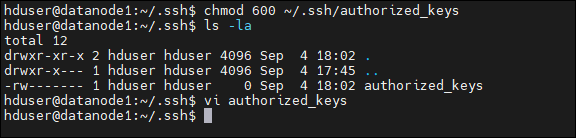

***Obs: Repeti esse mesmo processo para o Datanode2***



**F-Iniciar o container datanode1 e datanode2**\

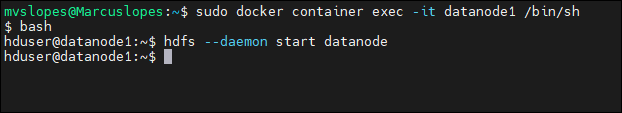






***Obs: Repeti esse mesmo processo para o Datanode2***

###**2.8- Acessando o Localhost**\
**Verificar status do Namenode e o datanode1 e datanode2**


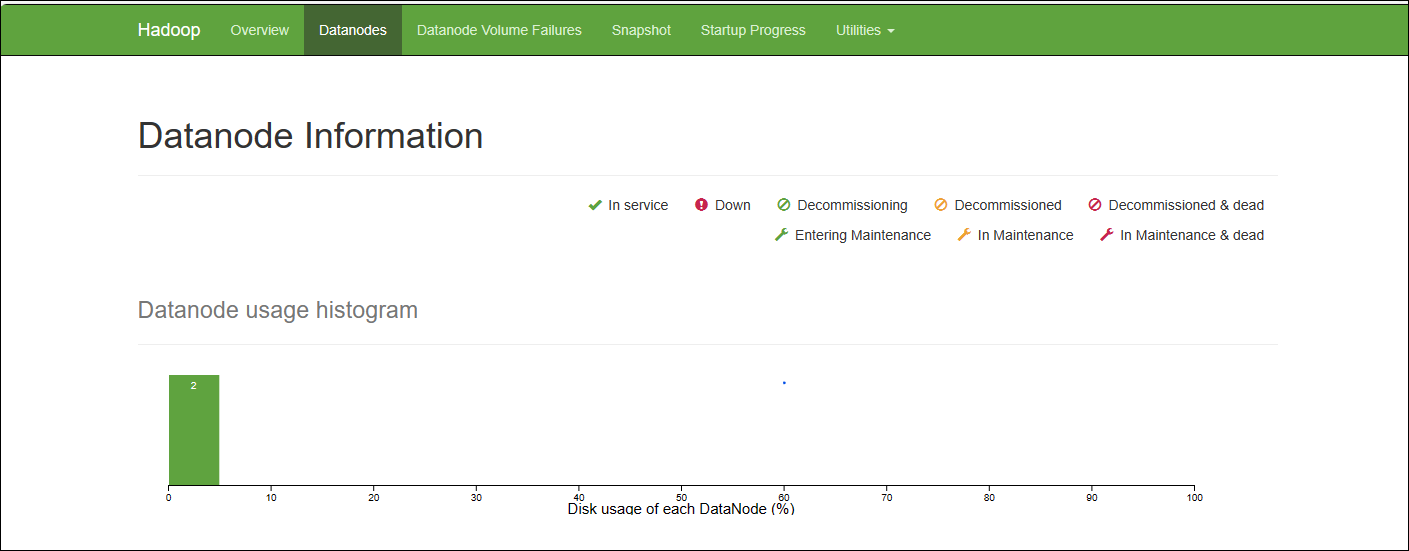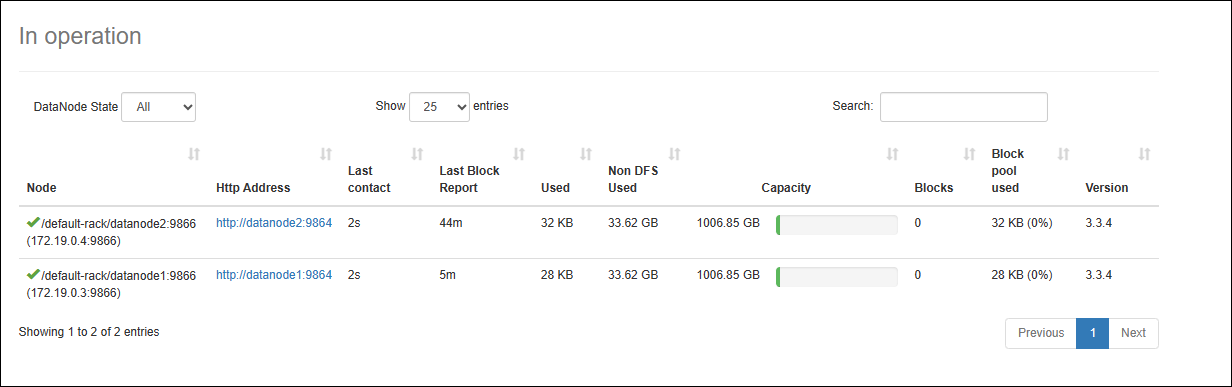




###**3- Sprint 02 - Finalizada**

Nessa sprint, entreguei a montagem da infraestrutura do **Data Lake** em um **cluster Hadoop HDFS**. Esse cluster possui um **NameNode** e **dois DataNodes**, o **DataNode1** e  **DataNode2**.\
 Data Lake está pronto para receber a **estrutura de armazenamento**, como a criação de pastas e outros recursos.

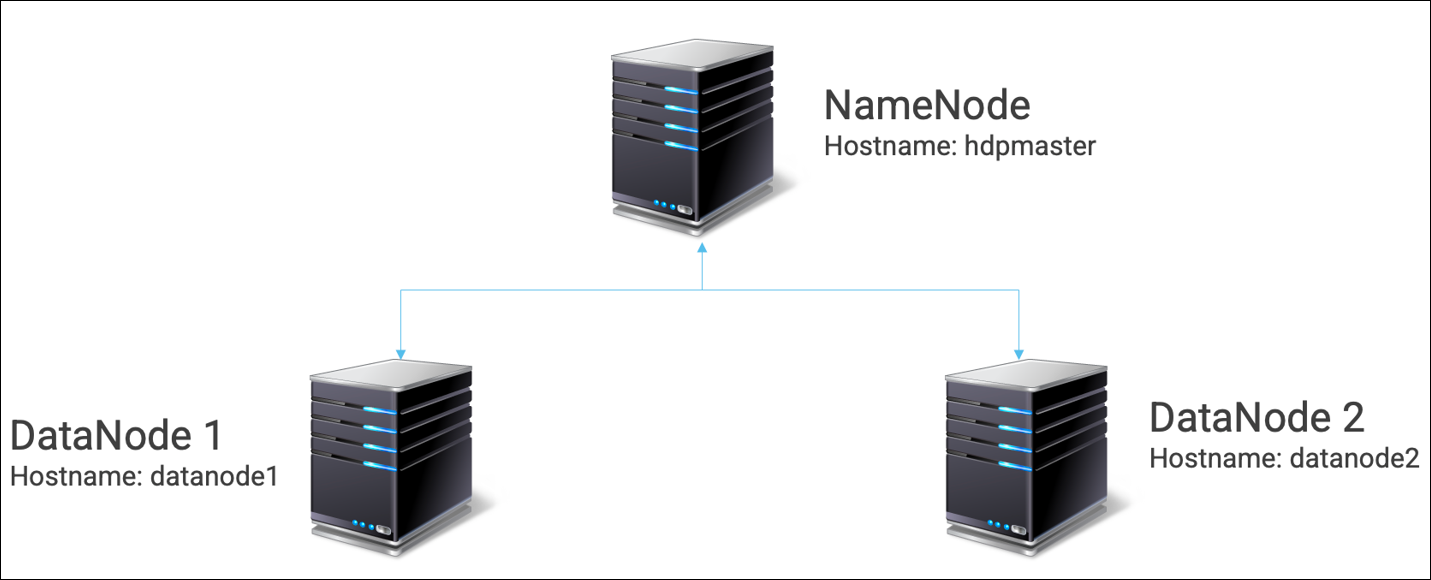